In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('adult_updated.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,age,fnlwgt,education,education-num,marital,relationship,race,sex,capital,capital.1,hours,country,salary,workclass,occupation
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov,Adm-clerical
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc,Exec-managerial
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,Handlers-cleaners
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,<=50K,Private,Handlers-cleaners
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,Prof-specialty


In [3]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital',
       'relationship', 'race', 'sex', 'capital', 'capital.1', 'hours',
       'country', 'salary', 'workclass', 'occupation'],
      dtype='object')

In [4]:
df.shape

(32561, 15)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital'}>],
       [<AxesSubplot:title={'center':'capital.1'}>,
        <AxesSubplot:title={'center':'hours'}>]], dtype=object)

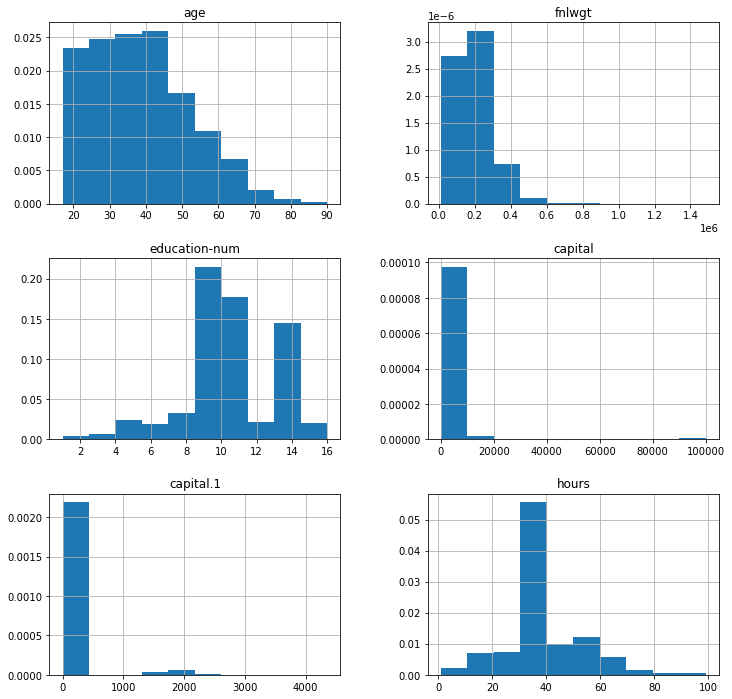

In [5]:
df.hist(density=True, figsize=(12,12))

### Observation1: There are a mixture of positive skews and negative skews among the other attributes

<BarContainer object of 8 artists>

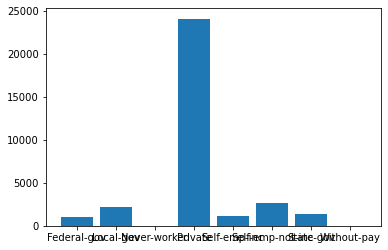

In [7]:
classes = df.groupby(['workclass'])['workclass'].count()
plt.bar(classes.index, classes)

### Observation: Private is highly dominating in workclass

<BarContainer object of 16 artists>

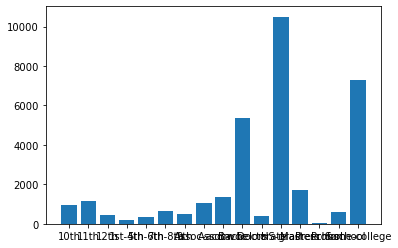

In [9]:
education = df.groupby(['education'])['education'].count()
plt.bar(education.index, education)

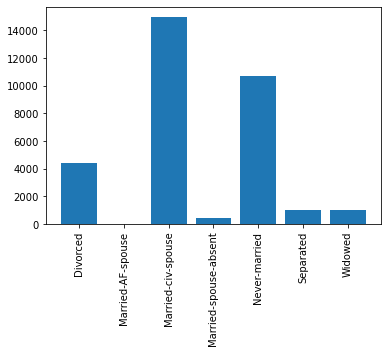

In [21]:
marital = df.groupby(['marital'])['marital'].count()
plt.bar(marital.index, marital)
plt.xticks(rotation='vertical')
plt.show()

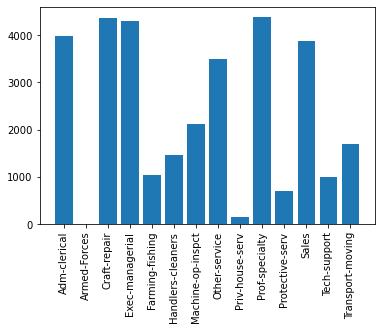

In [20]:
occupation = df.groupby(['occupation'])['occupation'].count()
plt.bar(occupation.index, occupation)
plt.xticks(rotation='vertical')
plt.show()

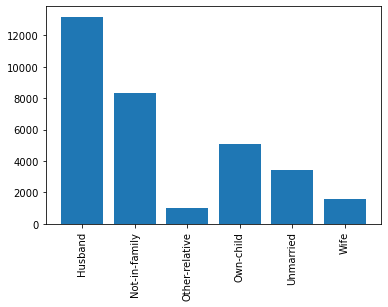

In [19]:
from matplotlib import *
relationship = df.groupby(['relationship'])['relationship'].count()
plt.bar(relationship.index, relationship)
plt.xticks(rotation='vertical')
plt.show()

### Observation: Husband is highly dominating in relationship column

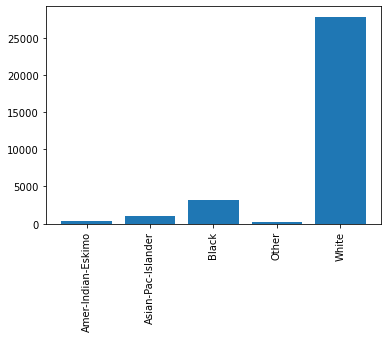

In [22]:
race = df.groupby(['race'])['race'].count()
plt.bar(race.index, race)
plt.xticks(rotation='vertical')
plt.show()

### Observation: White is highly dominating in Race column

In [24]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital',
       'relationship', 'race', 'sex', 'capital', 'capital.1', 'hours',
       'country', 'salary', 'workclass', 'occupation'],
      dtype='object')

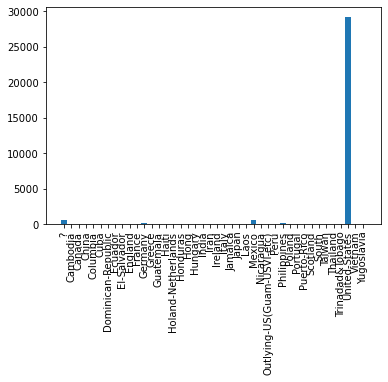

In [25]:
country = df.groupby(['country'])['country'].count()
plt.bar(country.index, country)
plt.xticks(rotation='vertical')
plt.show()

### Observation: US is highly dominating in Country column

In [26]:
df.cov()

,age,fnlwgt,education-num,capital,capital.1,hours
age,186.061400,-1.103507e+05,1.281849,7.824819e+03,317.560742,11.580130
fnlwgt,-110350.685300,1.114080e+10,-11729.527298,3.366625e+05,-436030.333167,-24460.426185
education-num,1.281849,-1.172953e+04,6.618890,2.330008e+03,82.856445,4.705338
capital,7824.818537,3.366625e+05,2330.007877,5.454254e+07,-94085.760688,7150.032029
capital.1,317.560742,-4.360303e+05,82.856445,-9.408576e+04,162376.937814,269.953755
hours,11.580130,-2.446043e+04,4.705338,7.150032e+03,269.953755,152.458995


In [30]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital',
       'relationship', 'race', 'sex', 'capital', 'capital.1', 'hours',
       'country', 'salary', 'workclass', 'occupation'],
      dtype='object')

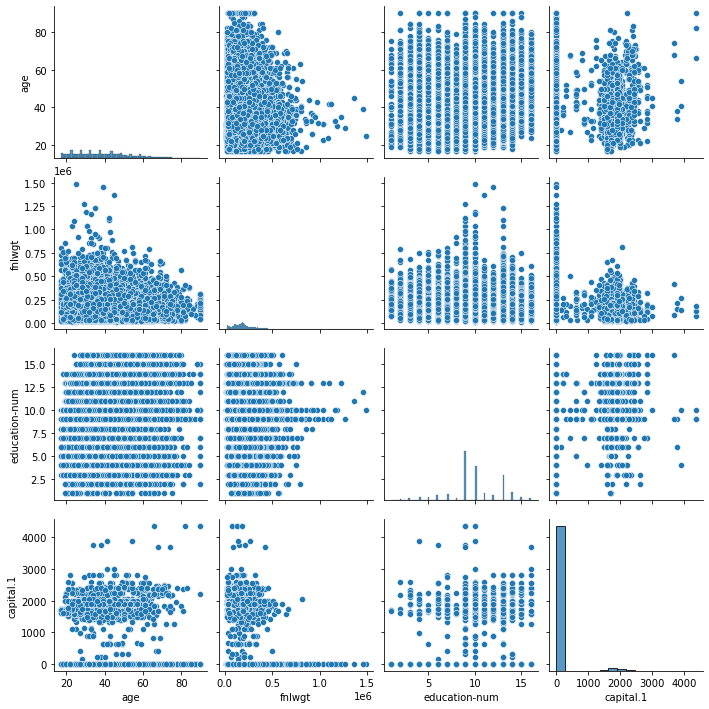

In [32]:
sns.pairplot(df.drop(columns=['marital', 'relationship', 'race', 'sex','capital','hours','workclass','occupation']))

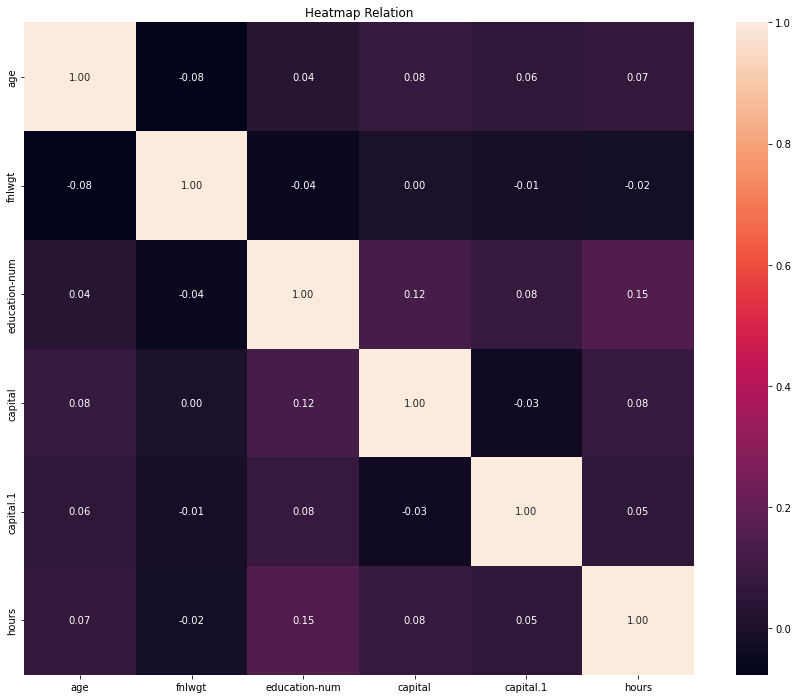

In [33]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(df.corr(), annot=True, fmt='.2f');

### Observation - Many features are showing -ve correaltion with dependent variable , So we can remove them to increase accuracy of our model

In [53]:
df1 = df.copy()
df1.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital',
       'relationship', 'race', 'sex', 'capital', 'capital.1', 'hours',
       'country', 'salary', 'workclass', 'occupation'],
      dtype='object')

<AxesSubplot:xlabel='age'>

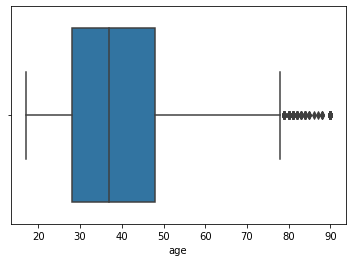

In [62]:
sns.boxplot(df1['age'])

<AxesSubplot:xlabel='fnlwgt'>

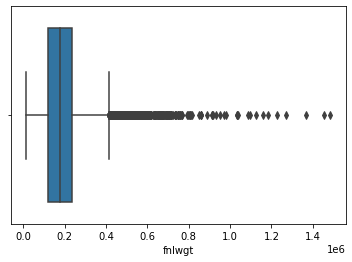

In [63]:
sns.boxplot(df1['fnlwgt'])

<AxesSubplot:xlabel='capital'>

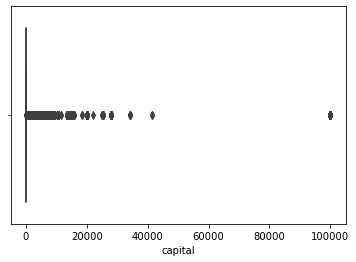

In [65]:
sns.boxplot(df1['capital'])

<AxesSubplot:xlabel='capital.1'>

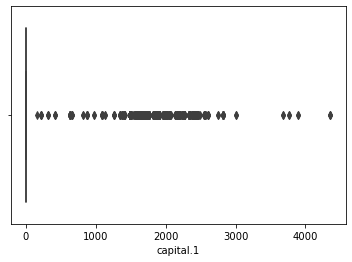

In [66]:
sns.boxplot(df1['capital.1'])

<AxesSubplot:xlabel='hours'>

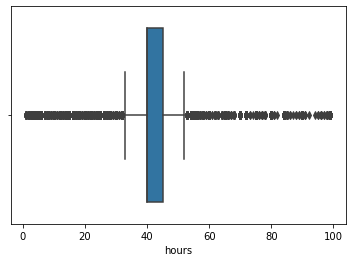

In [67]:
sns.boxplot(df1['hours'])

### Observation- Outliers are there in our data

## CHECKING FOR TRANSFORMATIONS

In [ ]:
# Log tranformation

In [70]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))

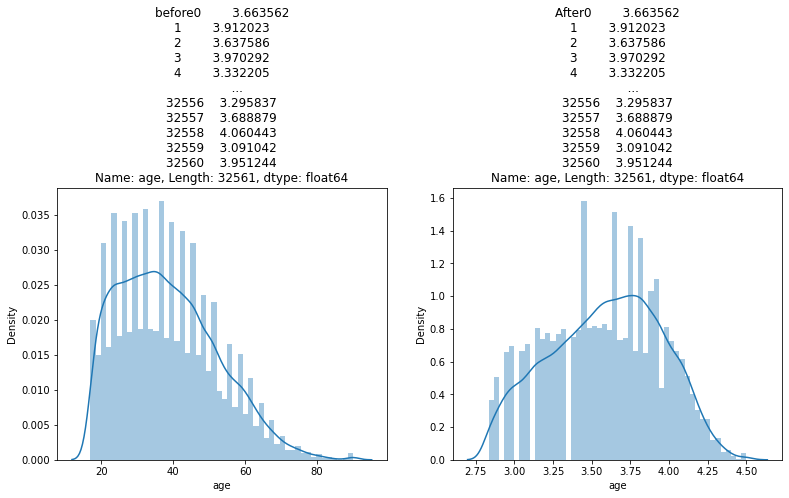

In [71]:
plots(df,'age',np.log(df['age']))

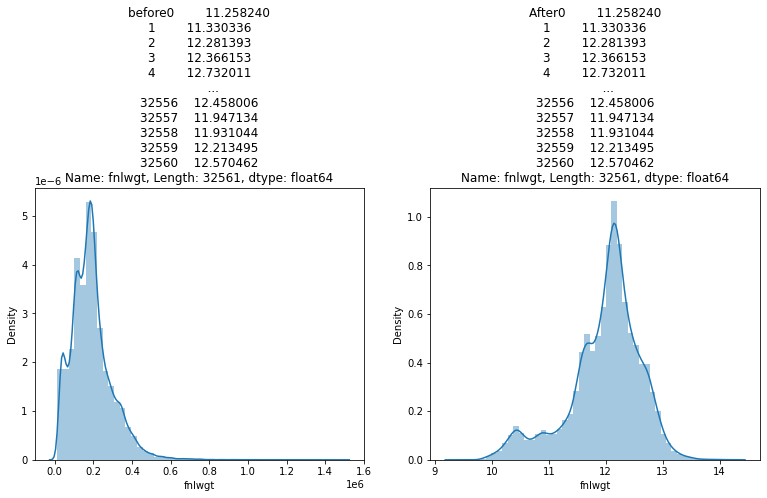

In [73]:
plots(df,'fnlwgt',np.log(df['fnlwgt']))

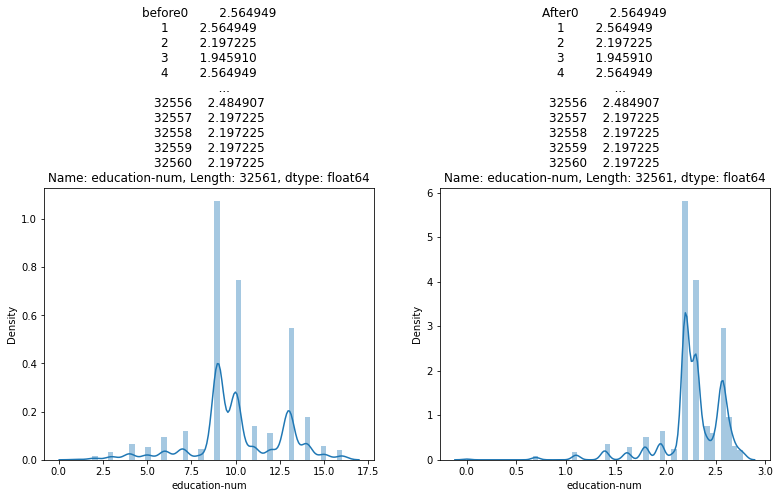

In [74]:
plots(df,'education-num',np.log(df['education-num']))

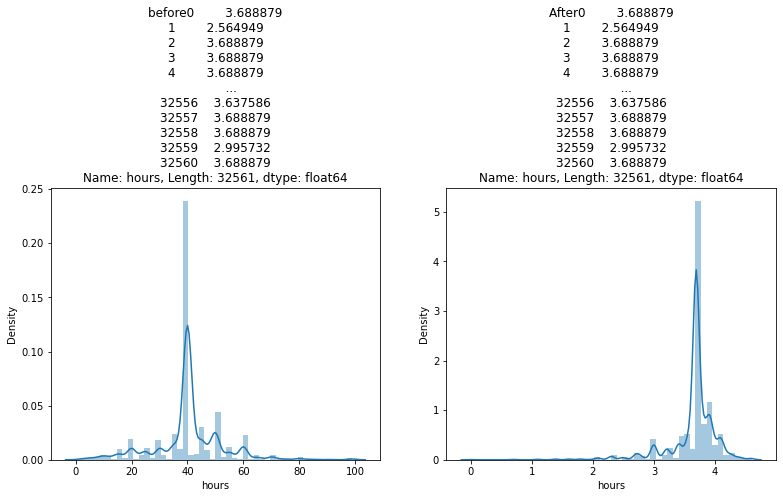

In [80]:
plots(df,'hours',np.log(df['hours']))

## Observation1 - As we can see in before /After Log transormation is working fine

### Observation2 : After Applying function transformmers , some skewness fixed

## Applying Power Transformers

In [81]:
df3 = df.copy()

In [82]:
X = df3.drop(columns=['salary'])
y = df3['salary']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

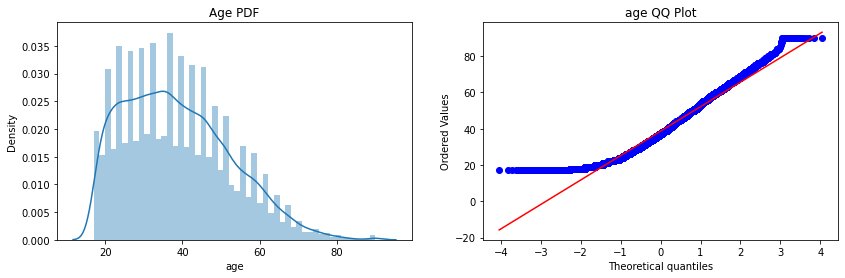

In [84]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['age'], dist="norm", plot=plt)
plt.title('age QQ Plot')

plt.show()

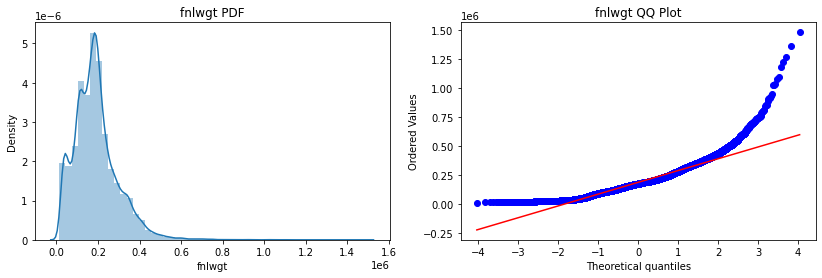

In [86]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['fnlwgt'])
plt.title('fnlwgt PDF')

plt.subplot(122)
stats.probplot(X_train['fnlwgt'], dist="norm", plot=plt)
plt.title('fnlwgt QQ Plot')

plt.show()

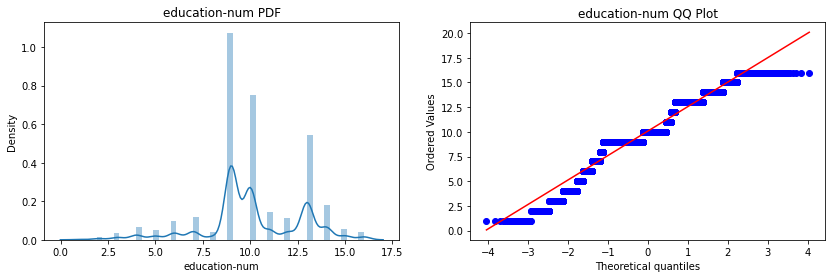

In [87]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['education-num'])
plt.title('education-num PDF')

plt.subplot(122)
stats.probplot(X_train['education-num'], dist="norm", plot=plt)
plt.title('education-num QQ Plot')

plt.show()

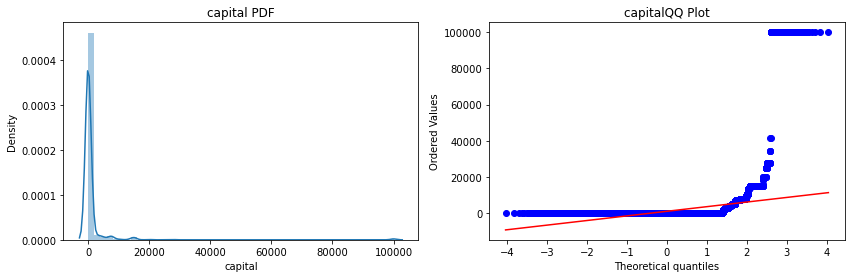

In [88]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['capital'])
plt.title('capital PDF')

plt.subplot(122)
stats.probplot(X_train['capital'], dist="norm", plot=plt)
plt.title('capitalQQ Plot')

plt.show()

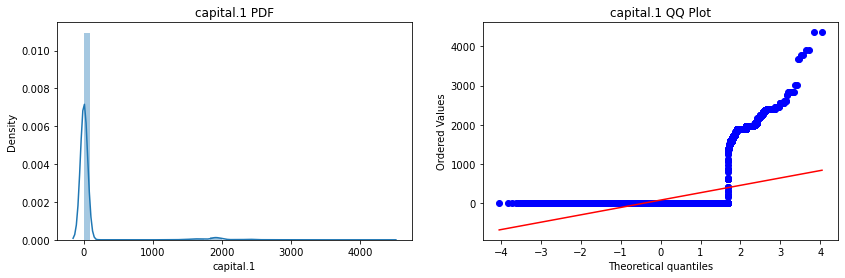

In [90]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['capital.1'])
plt.title('capital.1 PDF')

plt.subplot(122)
stats.probplot(X_train['capital.1'], dist="norm", plot=plt)
plt.title('capital.1 QQ Plot')

plt.show()

## Observation1 : We can see function transformers are working better than Power Transformers